In [1]:
import numpy as np
import os

def parse_g20_file(file_path):
    vertices = set()  # Use a set to ensure unique vertices
    edges = []

    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            if parts[0] == 'VERTEX_SE2':
                vertex_id = int(parts[1])
                vertices.add(vertex_id)
            elif parts[0] == 'EDGE_SE2':
                vertex1 = int(parts[1])
                vertex2 = int(parts[2])
                edges.append((vertex1, vertex2))

    return sorted(vertices), edges  # Sorting to maintain order

def create_adjacency_matrix(vertices, edges):
    n = len(vertices)
    adjacency_matrix = np.zeros((n, n), dtype=int)

    vertex_index = {vertex: idx for idx, vertex in enumerate(vertices)}

    for edge in edges:
        vertex1, vertex2 = edge
        idx1 = vertex_index[vertex1]
        idx2 = vertex_index[vertex2]
        adjacency_matrix[idx1][idx2] = 1
        adjacency_matrix[idx2][idx1] = 1  # Assuming the graph is undirected

    return adjacency_matrix

In [2]:
# dataset = "data/input_INTEL_g2o.g2o"
dataset = "data/input_M3500_g2o.g2o"
# dataset = "data/input_MITb_g2o.g2o"

In [3]:
vertices, edges = parse_g20_file(dataset)
adjacency_matrix = create_adjacency_matrix(vertices, edges)

print(adjacency_matrix)

print(adjacency_matrix.shape[0])

unique_edges_count = np.count_nonzero(np.triu(adjacency_matrix, k=1))
print(f"unique edge count = {unique_edges_count}")

num_nodes = adjacency_matrix.shape[0]
average_connectivity = unique_edges_count / num_nodes
print("Average connectivity:", average_connectivity)

[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 1]
 [0 0 0 ... 0 1 0]]
3500
unique edge count = 5453
Average connectivity: 1.558


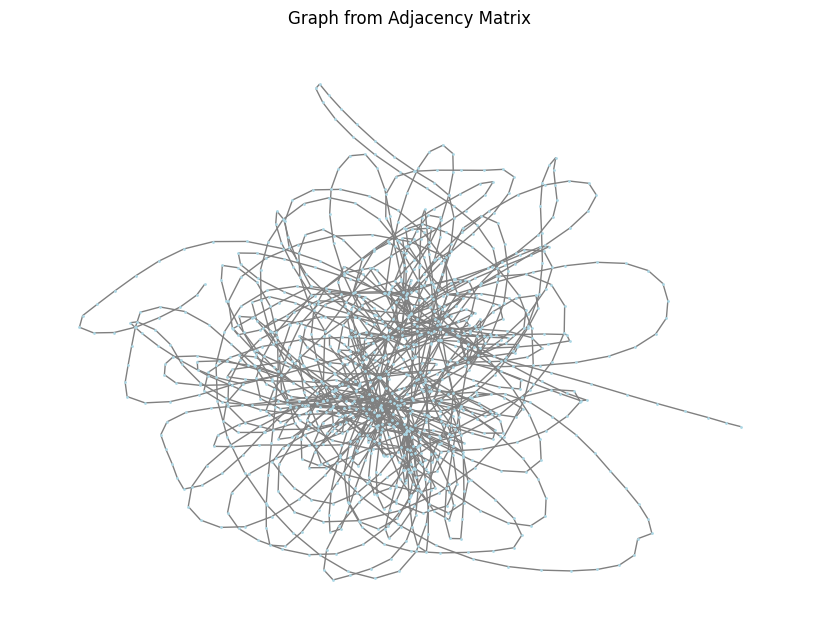

In [5]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(adjacency_matrix)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=False, node_color='lightblue', edge_color='gray', node_size=1, font_size=16)
plt.title("Graph from Adjacency Matrix")
plt.show()